#Basic Exercise

##Setup

In [2]:
!pip install nltk

In [3]:
import pandas as pd
import numpy as np
import string
import re

In [4]:
from nltk.corpus import brown
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

##Step 1

In [5]:
words = brown.words()
# regex = re.compile('[^a-zA-Z]')
words = [w.lower().translate(str.maketrans('', '', string.punctuation)) for w in words]
# words = [w.lower() for w in words]
fdist = nltk.FreqDist(words)

##Step 2

In [6]:
fdist_sorted=sorted(fdist.items(), key=lambda x: x[1], reverse=True)
del fdist_sorted[0]
size_of_brown = 0
for i in fdist_sorted:
  size_of_brown+=i[1]
to_5k = fdist_sorted[:5000]

In [7]:
to_5k[:5]

[('the', 69971), ('of', 36412), ('and', 28853), ('to', 26158), ('a', 23308)]

In [8]:
to_5k[-5:]

[('peered', 20), ('crawled', 20), ('nude', 20), ('okay', 20), ('borden', 20)]

In [9]:
dict_brown = {}
for item in fdist_sorted:
  dict_brown[item[0]] = item[1]

In [10]:
size_of_brown

1013319

In [11]:
W =[]
for word in to_5k:
  if word[0] not in W:
    W.append(word[0])

In [12]:
W.index('boy')

386

In [13]:
len(W)

5000

In [14]:
RG56 = [['cord', 'smile', 0.02],
          ['rooster', 'voyage', 0.04],
          ['noon', 'string', 0.04],
          ['fruit', 'furnace', 0.05],
          ['autograph', 'shore', 0.06],
          ['automobile', 'wizard', 0.11],
          ['mound', 'stove', 0.14],
          ['grin', 'implement', 0.18],
          ['asylum', 'fruit', 0.19],
          ['asylum', 'monk', 0.39],
          ['graveyard', 'madhouse', 0.42],
          ['glass', 'magician', 0.44],
          ['boy', 'rooster', 0.44],
          ['cushion', 'jewel', 0.45],
          ['monk', 'slave', 0.57],
          ['asylum', 'cemetery', 0.79],
          ['coast', 'forest', 0.85],
          ['grin', 'lad', 0.88],
          ['shore', 'woodland', 0.90],
          ['monk', 'oracle', 0.91],
          ['boy', 'sage', 0.96],
          ['automobile', 'cushion', 0.97],
          ['mound', 'shore', 0.97],
          ['lad', 'wizard', 0.99],
          ['forest', 'graveyard', 1.00],
          ['food', 'rooster', 1.09],
          ['cemetery', 'woodland', 1.18],
          ['shore', 'voyage', 1.22],
          ['bird', 'woodland', 1.24],
          ['coast', 'hill', 1.26],
          ['furnace', 'implement', 1.37],
          ['crane', 'rooster', 1.41],
          ['hill', 'woodland', 1.48],
          ['car', 'journey', 1.55],
          ['cemetery', 'mound', 1.69],
          ['glass', 'jewel', 1.78],
          ['magician', 'oracle', 1.82],
          ['crane', 'implement', 2.37],
          ['brother', 'lad', 2.41],
          ['sage', 'wizard', 2.46],
          ['oracle', 'sage', 2.61],
          ['bird', 'crane', 2.63],
          ['bird', 'cock', 2.63],
          ['food', 'fruit', 2.69],
          ['brother', 'monk', 2.74],
          ['asylum', 'madhouse', 3.04],
          ['furnace', 'stove', 3.11],
          ['magician', 'wizard', 3.21],
          ['hill', 'mound', 3.29],
          ['cord', 'string', 3.41],
          ['glass', 'tumbler', 3.45],
          ['grin', 'smile', 3.46],
          ['serf', 'slave', 3.46],
          ['journey', 'voyage', 3.58],
          ['autograph', 'signature', 3.59],
          ['coast', 'shore', 3.60],
          ['forest', 'woodland', 3.65],
          ['implement', 'tool', 3.66],
          ['cock', 'rooster', 3.68],
          ['boy', 'lad', 3.82],
          ['cushion', 'pillow', 3.84],
          ['cemetery', 'graveyard', 3.88],
          ['automobile', 'car', 3.92],
          ['midday', 'noon', 3.94],
          ['gem', 'jewel', 3.94]]

In [15]:
RG56_words = []
for item in RG56:
  RG56_words.append(item[0])
  RG56_words.append(item[1])
RG56_words = list(set(RG56_words))

In [16]:
len(RG56_words)

48

In [17]:
W=W+RG56_words
W = list(set(W))

In [18]:
len(W)

5031

##Setup 3

In [19]:
from collections import Counter
from nltk.util import ngrams

n = 2
bigrams = ngrams(words, n)
bigrams_freq = Counter(bigrams)

In [20]:
from scipy.sparse import lil_matrix
Wlen = len(W)
M1 = lil_matrix((Wlen,Wlen))

In [21]:
M1.shape

(5031, 5031)

In [22]:
for i in range(Wlen): 
  for j in range(Wlen):
    if (W[i],W[j]) in bigrams_freq:
      M1[i,j] = bigrams_freq[(W[i],W[j])]

In [23]:
M1.sum()

671463.0

##Step 4
PMI from https://web.eecs.umich.edu/~wangluxy/archive/neu_courses/cs6120_sp2018/slides_cs6120_sp18/semantics_part1.pdf

In [24]:
import math
import scipy.sparse
import random
import itertools

pij = 0
pi = 0
pj = 0
M1_plus = lil_matrix((Wlen,Wlen))
new_size = M1.sum()
rows_sum = M1.sum(axis=0)
columns_sum = M1.sum(axis=1)
columns_sum_list=columns_sum.tolist()
rows_sum_list = rows_sum.T.tolist()
M1 = M1.tocoo()
for i,j,v in zip(M1.row, M1.col, M1.data):
  pi = (rows_sum_list[i][0]+1)/new_size
  pj = (columns_sum_list[j][0]+1)/new_size
  pij = v/new_size
  M1_plus[i,j] += max((math.log(pij)-math.log(pi*pj)),0)

In [25]:
rows_sum_list[5]

[378.0]

In [26]:
# import math
# import scipy.sparse
# import random
# import itertools
# pij = 0
# pi = 0
# pj = 0
# M1_plus = np.zeros(shape=(Wlen,Wlen))
# new_size = M1.sum()
# rows_sum = M1.sum(axis=0)
# columns_sum = M1.sum(axis=1)
# columns_sum_list=columns_sum.tolist()
# rows_sum_list = rows_sum.T.tolist()
# for i in range(Wlen):
#   pi = rows_sum_list[i]/new_size
#   for j in range(Wlen):
#     pj = columns_sum_list[j]/new_size
#     if M1[i,j] != 0 or M1[j,i] != 0 :
#       pij = (M1[i,j]+M1[j,i])/new_size
#       print('-i is: ',i,' -j is :',j,' -pj is :',pj)
#       M1_plus[i,j] = max((math.log(pij)-math.log(pi*pj)),0)

In [27]:
print(W[2408])

target


In [28]:
# import math
# pij = 0
# pi = 0
# pj = 0
# M1_plus = lil_matrix((Wlen,Wlen))
# for i in range(Wlen):
#   pi = dict_brown[W[i]]/size_of_brown
#   for j in range(Wlen):
#     pj = dict_brown[W[j]]/size_of_brown
#     pij = (M1[i,j]+M1[j,i])/(size_of_brown-1)
#     if pij==0:
#       M1_plus[i,j]=0
#     else:
#       M1_plus[i,j] = max((math.log(pij)-math.log(pi*pj)),0)

In [29]:
M1_plus.shape

(5031, 5031)

##Step 5

In [30]:
#PCA does not support sparse input. See TruncatedSVD for a possible alternative
from sklearn.decomposition import TruncatedSVD

SVD10 = TruncatedSVD(n_components=10)
M2_10 = SVD10.fit_transform(M1_plus)
SVD100 = TruncatedSVD(n_components=100)
M2_100 = SVD100.fit_transform(M1_plus)
SVD300 = TruncatedSVD(n_components=300)
M2_300 = SVD300.fit_transform(M1_plus)

In [31]:
M2_300[1,5]

-0.027567311867295087

##Step 6

In [32]:
S = RG56
P = [(w1,w2) for w1,w2,score in RG56]

##Step 7

In [33]:
M1 = M1.tocsr()
M1_plus = M1_plus.tocsr()

In [34]:
from sklearn.metrics.pairwise import cosine_similarity
SM1 = [(w1,w2,cosine_similarity(M1[W.index(w1),:],M1[W.index(w2),:])) for w1,w2 in P]

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
SM1 = [(w1,w2,cosine_similarity(M1[W.index(w1)],M1[W.index(w2)])) for w1,w2 in P]
SM1_plus = [(w1,w2,cosine_similarity(M1_plus[W.index(w1)],M1_plus[W.index(w2)])[0][0]) for w1,w2 in P]
SM2_10 = [(w1,w2,cosine_similarity(M2_10[W.index(w1)].reshape(1, -1),M2_10[W.index(w2)].reshape(1, -1))[0][0]) for w1,w2 in P]
SM2_100 = [(w1,w2,cosine_similarity(M2_100[W.index(w1)].reshape(1, -1),M2_100[W.index(w2)].reshape(1, -1))[0][0]) for w1,w2 in P]
# SM2_200 = [(w1,w2,cosine_similarity(M2_200[W.index(w1)].reshape(1, -1),M2_200[W.index(w2)].reshape(1, -1))[0][0]) for w1,w2 in P]
SM2_300 = [(w1,w2,cosine_similarity(M2_300[W.index(w1)].reshape(1, -1),M2_300[W.index(w2)].reshape(1, -1))[0][0]) for w1,w2 in P]

##Step 8

In [36]:
from scipy.stats import pearsonr
print('Pearson correlation between s and human-judged reports:')
print('Pearson for SM1: ',pearsonr([float(score) for w1,w2,score in SM1],[score for w1,w2,score in S]))
print('Pearson for SM1_plus: ',pearsonr([float(score) for w1,w2,score in SM1_plus],[score for w1,w2,score in S]))
print('Pearson for SM2_10 : ',pearsonr([float(score) for w1,w2,score in SM2_10 ],[score for w1,w2,score in S]))
print('Pearson for SM2_100 : ',pearsonr([float(score) for w1,w2,score in SM2_100 ],[score for w1,w2,score in S]))
# print('Pearson for SM2_200: ',pearsonr([float(score) for w1,w2,score in SM2_200],[score for w1,w2,score in S]))
print('Pearson for SM2_300: ',pearsonr([float(score) for w1,w2,score in SM2_300],[score for w1,w2,score in S]))

Pearson correlation between s and human-judged reports:
Pearson for SM1:  (0.3079205548078232, 0.012584419786834151)
Pearson for SM1_plus:  (0.17470666259418635, 0.16394322869902803)
Pearson for SM2_10 :  (0.021615562148500904, 0.8642955164953214)
Pearson for SM2_100 :  (0.30914146702819717, 0.01222003427089195)
Pearson for SM2_300:  (0.2918791794460514, 0.01831595025221078)


#Lab 1

##Analogy test

###Step 1

In [49]:
!brew install wget
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gzip -d GoogleNews-vectors-negative300.bin.gz


/bin/bash: brew: command not found
--2022-02-07 04:50:22--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.198.80
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.198.80|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



###Step 2

In [50]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


In [51]:
np.concatenate([model['dog'].reshape(1,-1),model['cat'].reshape(1,-1)],axis=0).shape



(2, 300)

###Step 3

In [52]:
w2v_cosine_sim = [[w1,w2,cosine_similarity(model[w1].reshape(1, -1),model[w2].reshape(1, -1))[0][0]] for w1,w2 in P]

In [53]:
w2v_cosine_sim[-5:]

[['cushion', 'pillow', 0.25161517],
 ['cemetery', 'graveyard', 0.6424807],
 ['automobile', 'car', 0.58383685],
 ['midday', 'noon', 0.5527407],
 ['gem', 'jewel', 0.6210811]]

In [54]:
print('Pearson for human judged and word2vec: ',pearsonr([float(score) for w1,w2,score in w2v_cosine_sim],[score for w1,w2,score in S]))
print('Pearson for human judged and SM2_300: ',pearsonr([float(score) for w1,w2,score in SM2_300],[score for w1,w2,score in S]))
print('Pearson for word2vec and SM2_300: ',pearsonr([float(score) for w1,w2,score in SM2_300],[float(score) for w1,w2,score in w2v_cosine_sim]))

Pearson for human judged and word2vec:  (0.7720616125197682, 5.091065805872837e-14)
Pearson for human judged and SM2_300:  (0.2918791794460514, 0.01831595025221078)
Pearson for word2vec and SM2_300:  (0.3392222331813933, 0.005704332625531111)


###Step 4

In [55]:
!wget -c http://www.fit.vutbr.cz/~imikolov/rnnlm/word-test.v1.txt

--2022-02-07 04:53:16--  http://www.fit.vutbr.cz/~imikolov/rnnlm/word-test.v1.txt
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 609126 (595K) [text/plain]
Saving to: ‘word-test.v1.txt’

word-test.v1.txt    100%[===================>] 594.85K   555KB/s    in 1.1s    

2022-02-07 04:53:18 (555 KB/s) - ‘word-test.v1.txt’ saved [609126/609126]



In [56]:
file1 = open('/content/word-test.v1.txt', 'r')
Lines = file1.readlines()
count = 0
a = []
for line in Lines:
    count += 1
    a.append(line.strip())

In [57]:
all_analogy = []
i = 0
j=0
analogy_cat = []
for line in a:
  if line.startswith(':'):
    analogy_cat.append(([line],i))
  if not(line.startswith(':')) or not(line.startswith('//')):
    analogy_words = line.split()
    all_analogy.append(analogy_words)
  i+=1

In [58]:
analogy_cat

[([': capital-common-countries'], 1),
 ([': capital-world'], 508),
 ([': currency'], 5033),
 ([': city-in-state'], 5900),
 ([': family'], 8368),
 ([': gram1-adjective-to-adverb'], 8875),
 ([': gram2-opposite'], 9868),
 ([': gram3-comparative'], 10681),
 ([': gram4-superlative'], 12014),
 ([': gram5-present-participle'], 13137),
 ([': gram6-nationality-adjective'], 14194),
 ([': gram7-past-tense'], 15794),
 ([': gram8-plural'], 17355),
 ([': gram9-plural-verbs'], 18688)]

In [59]:
size = len(all_analogy)
cat_map = [(0,0) for item in analogy_cat]
for i in range(1,len(analogy_cat)):
  cat_map[i-1] = (analogy_cat[i-1][0],analogy_cat[i-1][1],analogy_cat[i][1]-1)
cat_map[-1] = (analogy_cat[-1][0],analogy_cat[-1][1],size-1)

In [60]:
cat_map

[([': capital-common-countries'], 1, 507),
 ([': capital-world'], 508, 5032),
 ([': currency'], 5033, 5899),
 ([': city-in-state'], 5900, 8367),
 ([': family'], 8368, 8874),
 ([': gram1-adjective-to-adverb'], 8875, 9867),
 ([': gram2-opposite'], 9868, 10680),
 ([': gram3-comparative'], 10681, 12013),
 ([': gram4-superlative'], 12014, 13136),
 ([': gram5-present-participle'], 13137, 14193),
 ([': gram6-nationality-adjective'], 14194, 15793),
 ([': gram7-past-tense'], 15794, 17354),
 ([': gram8-plural'], 17355, 18687),
 ([': gram9-plural-verbs'], 18688, 19558)]

In [61]:
len(all_analogy)

19559

In [62]:
available_analogy = []
cat_map_available = []
for count ,analogy in enumerate(all_analogy):
  result =  all(elem in W  for elem in analogy)
  if result:
    if count < 8874:
      cat_map_available.append('semantic')
    else:
      cat_map_available.append('syntetic')
    available_analogy.append(analogy)

In [63]:
len(cat_map_available)

2082

In [64]:
cat_map_available.index('syntetic')

90

In [65]:
available_analogy_words = []
for words in available_analogy:
  for word in words:
    available_analogy_words.append(word)
available_analogy_words = list(set(available_analogy_words))

In [66]:
analogy_embed_w2v = []
analogy_words_w2v = []
for word in W :
  if word in model:
    analogy_words_w2v.append(word)
    analogy_embed_w2v.append(model[word])

In [67]:
analogy_embed_LSA = []
for word in analogy_words_w2v :
  analogy_embed_LSA.append(M2_300[W.index(word)])
analogy_embed_LSA = np.array(analogy_embed_LSA)
analogy_embed_LSA.shape

(4911, 300)

In [68]:
print(len(analogy_embed_w2v))
print(len(analogy_words_w2v))

4911
4911


In [69]:
analogy_embed_w2v = np.array(analogy_embed_w2v)
analogy_embed_w2v.shape

(4911, 300)

In [70]:
#for w2v it taken from https://stackoverflow.com/questions/32759712/how-to-find-the-closest-word-to-a-vector-using-word2vec

def analogy_calc_w2v(w1,w2,w3,embedding,words):
  closest_dist = 1
  best_word_index = 0
  diff = embedding[words.index(w1)] - embedding[words.index(w2)]
  pred_embed = embedding[words.index(w3)] + diff
  for word in words :
    if word not in [w1,w2,w3]:
      dist = 1 - cosine_similarity(pred_embed.reshape(1,-1),embedding[words.index(word)].reshape(1,-1))[0][0]
      if dist < closest_dist:
        best_word_index = words.index(word)
        closest_dist = dist
  
  
  return words[best_word_index],best_word_index,closest_dist

In [71]:
import sklearn
def analogy_diff_calc(available_analogy,embedding,words):
  pred_embeddings = []
  pred_words =[]
  final_result = []
  # print(available_analogy)
  for w1,w2,w3,w4 in available_analogy:
    diff = embedding[words.index(w1)] - embedding[words.index(w2)]
    pred_embed = embedding[words.index(w3)] + diff
    pred_embeddings.append(pred_embed)
  # print(pred_embeddings)
  pred_embeddings = sklearn.preprocessing.normalize(np.array(pred_embeddings), norm="l1")
  embedding = sklearn.preprocessing.normalize(np.array(embedding), norm="l1")
  product_sim = pred_embeddings @ embedding.T
  sorted_sim = (-product_sim).argsort()
  for i in range(sorted_sim.shape[0]):
    row = sorted_sim[i]
    top4 = np.flip((row[:4]))
    w1,w2,w3,w4 = available_analogy[i]
    # print(top4)
    # print(words.index(w1),words.index(w2),words.index(w3))
    for index in top4:
      if index in [words.index(w1),words.index(w2),words.index(w3)]:
        # print('yes')
        continue
      else:
        # print(index)
        word = words[index]
    # print(w1,w2,w3,word)
    pred_words.append(word)
  # for count in range(len(available_analogy)):

  #   r= available_analogy[count].copy()
  #   print(r,pred_words[count])
  #   print(len(r))
  #   print(type(r))
  #   r2 =r.append(pred_words[count])
  #   print(r2)
    # final_result.append(r.append(pred_words[count]))
  # print(pred_words)
  return pred_words

In [72]:
available_analogy[:2]

[['boy', 'girl', 'brother', 'sister'], ['boy', 'girl', 'father', 'mother']]

In [73]:
pred_words_w2v = analogy_diff_calc(available_analogy,analogy_embed_w2v,analogy_words_w2v)
pred_words_LSA = analogy_diff_calc(available_analogy,analogy_embed_LSA,analogy_words_w2v)

In [74]:
len(pred_words_w2v)

2082

In [75]:
def calc_accuracy(available_analogy,pred_words,cat_map_available):
  all_syn_correct = cat_map_available.count('syntetic') 
  all_sem_correct = cat_map_available.count('semantic')
  syn_correct = 0
  sem_correct = 0 
  for i in range(len(available_analogy)):
    if available_analogy[i][3] == pred_words [i]:
      if cat_map_available[i] =='syntetic':
        syn_correct+=1
      else :
        sem_correct+=1
  print('Accuracy for syntetic: ',syn_correct/all_syn_correct)
  print('Accuracy for semantic: ',sem_correct/all_sem_correct)


In [76]:
calc_accuracy(available_analogy,pred_words_w2v,cat_map_available)

Accuracy for syntetic:  0.14156626506024098
Accuracy for semantic:  0.06666666666666667


In [77]:
calc_accuracy(available_analogy,pred_words_LSA,cat_map_available)

Accuracy for syntetic:  0.061746987951807226
Accuracy for semantic:  0.1111111111111111


##Diachronic word embedding

###Step 1

In [37]:
import pickle
file = open("/content/data.pkl",'rb')
data = pickle.load(file)

In [38]:
data['E'][1][2].shape

(300,)

###Step 2

####Method1
Calculate the cosine distance of each word for each two following decade and calcuate the variance 

In [39]:
semantic_change = []
for i in range(2000):
  cosine_dist = []
  for j in range(1,len(data['d'])):
    cosine_dist.append(1-cosine_similarity(data['E'][i][j].reshape(1, -1),data['E'][i][j-1].reshape(1, -1))[0][0])
  semantic_change.append(cosine_dist)

In [40]:
semantic_change[0]

[0.31214305866948444,
 0.3205812053756597,
 0.3523720485493146,
 0.3333269575621357,
 0.37701513254969266,
 0.38991382592539636,
 0.35640704288837244,
 0.31868190824684184,
 0.35110624505093235]

In [41]:
import statistics
semantic_change_method1 = []
for item in semantic_change:
  semantic_change_method1.append(statistics.variance(item))

In [42]:
semantic_change_method1[:5]

[0.0007204961535312207,
 0.0007004102364382252,
 0.0002873686910700435,
 0.001992651887529836,
 0.000851607403015123]

In [43]:
print('Top 20 changed words')
for index in (-np.array(semantic_change_method1)).argsort()[:20]:
  print(data['w'][index])

Top 20 changed words
shri
computer
techniques
ml
skills
goals
objectives
mcgraw
programs
sector
evaluation
input
therapy
procedures
variables
radio
jobs
subsection
implications
technology


In [44]:
print('Top 20 unchanged words')
for index in (np.array(semantic_change_method1)).argsort()[:20]:
  print(data['w'][index])

Top 20 unchanged words
november
increase
reply
article
card
root
calcium
rome
jurisdiction
situation
president
act
pair
father
force
bath
troops
night
remainder
sunday


####Method2
Average distance of word from first appearance


In [80]:
semantic_change = []
for i in range(2000):
  cosine_dist = []
  for j in range(1,len(data['d'])):
    cosine_dist.append(1-cosine_similarity(data['E'][i][0].reshape(1, -1),data['E'][i][j].reshape(1, -1))[0][0])
  semantic_change.append(cosine_dist)

In [81]:
import statistics
semantic_change_method2 = []
for item in semantic_change:
  semantic_change_method2.append(statistics.mean(item))

In [82]:
print('Top 20 changed words')
for index in (-np.array(semantic_change_method2)).argsort()[:20]:
  print(data['w'][index])

Top 20 changed words
mcgraw
ml
techniques
skills
computer
objectives
programs
shri
radio
sector
goals
therapy
van
input
patterns
evaluation
berkeley
jobs
wiley
stanford


In [83]:
print('Top 20 unchanged words')
for index in (np.array(semantic_change_method2)).argsort()[:20]:
  print(data['w'][index])

Top 20 unchanged words
april
october
november
miles
september
january
february
trees
feet
july
months
increase
years
vessels
december
june
church
century
payment
daughter


####Method3
averaging the top 3 changes of words compared to the first appearance of the word

In [84]:
semantic_change = []
for i in range(2000):
  cosine_dist = []
  for j in range(1,len(data['d'])):
    cosine_dist.append(1-cosine_similarity(data['E'][i][0].reshape(1, -1),data['E'][i][j].reshape(1, -1))[0][0])
  semantic_change.append(cosine_dist)

In [85]:
import statistics
semantic_change_method3 = []
for item in semantic_change:
  top3_scores = []
  for index in (-np.array(item).argsort())[:3]:
    top3_scores.append(item[index])
  semantic_change_method3.append(statistics.mean(top3_scores))

In [86]:
print('Top 20 changed words')
for index in (-np.array(semantic_change_method3)).argsort()[:20]:
  print(data['w'][index])

Top 20 changed words
skills
ml
techniques
mcgraw
computer
shri
objectives
programs
sector
goals
radio
therapy
input
patterns
media
berkeley
evaluation
impact
perspective
stanford


In [87]:
print('Top 20 unchanged words')
for index in (np.array(semantic_change_method3)).argsort()[:20]:
  print(data['w'][index])

Top 20 unchanged words
april
november
february
september
october
january
june
months
miles
december
trees
door
evening
years
july
disease
increase
river
church
century


### 3-3 Table

In [88]:
table_3by3 = [[0 for i in range(3)]for i in range(3)]
scores = [semantic_change_method1,semantic_change_method2,semantic_change_method3]
for i in range(3):
  for j in range(3):
    table_3by3[i][j] = pearsonr(scores[i],scores[j])[0]

In [89]:
import pandas
methods = ["variance method","average cosine distance from start","average of top 3 distance from start"] 
data_table = table_3by3
headers=methods
pandas.DataFrame(data_table, headers, headers)

,variance method,average cosine distance from start,average of top 3 distance from start
variance method,1.000000,0.538126,0.529446
average cosine distance from start,0.538126,1.000000,0.974105
average of top 3 distance from start,0.529446,0.974105,1.000000


###Step 3


####eval: comparing to the unchanged words
One way to evaluate the change for a word is seeing how much change a word has compared to the most unchanged words. To find the most unchanged words we take the 200 unchanged words that appeared in our previous three methods and get the common words. 

In [90]:
def IntersecOfSets(arr1, arr2, arr3):
    # Converting the arrays into sets
    s1 = set(arr1)
    s2 = set(arr2)
    s3 = set(arr3)
      
    # Calculates intersection of 
    # sets on s1 and s2
    set1 = s1.intersection(s2)         #[80, 20, 100]
      
    # Calculates intersection of sets
    # on set1 and s3
    result_set = set1.intersection(s3)
      
    # Converts resulting set to list
    final_list = list(result_set)
    print(type(final_list))
    print(final_list)
  

In [91]:
method1_unchanged_words = [data['w'][i] for i in (np.array(semantic_change_method1)).argsort()[:100]]
method2_unchanged_words = [data['w'][i] for i in (np.array(semantic_change_method2)).argsort()[:100]]
method3_unchanged_words = [data['w'][i] for i in (np.array(semantic_change_method3)).argsort()[:100]]
# unchanged_words= IntersecOfSets(method1_unchanged_words,method2_unchanged_words,method3_unchanged_words)
# type(unchanged_words)
s1 = set(method1_unchanged_words)
s2 = set(method2_unchanged_words)
s3 = set(method3_unchanged_words)
  
# Calculates intersection of 
# sets on s1 and s2
set1 = s1.intersection(s2)         #[80, 20, 100]
  
# Calculates intersection of sets
# on set1 and s3
result_set = set1.intersection(s3)
  
# Converts resulting set to list
final_list = list(result_set)

In [92]:
# len(unchanged_words)
unchanged_words =final_list
unchanged_words

['century',
 'troops',
 'centuries',
 'december',
 'april',
 'summer',
 'january',
 'feet',
 'increase',
 'november',
 'water']

In [93]:
def evaluation_per_decade(decade,word,unchanged_words):
  word_distance = []
  for unchanged_word in unchanged_words:
    word_distance.append(1-cosine_similarity(data['E'][data['w'].index(word)][decade].reshape(1, -1),data['E'][data['w'].index(unchanged_word)][decade].reshape(1, -1))[0][0])
  return statistics.mean(word_distance)

In [94]:
semantic_change = []
for i in range(2000):
  cosine_dist = []
  if i%100 ==0:
    print(i)
  for j in range(len(data['d'])):
    cosine_dist.append(evaluation_per_decade(j,data['w'][i],unchanged_words))
  semantic_change.append(cosine_dist)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [95]:
semantic_change[data['w'].index('ml')]

[1.0,
 1.0,
 0.9220700879048962,
 0.9048385529073107,
 0.926393200111417,
 0.9114823136144486,
 0.9341087471409697,
 0.9330438398946119,
 0.9759397072808736,
 0.964810977666814]

In [96]:
import statistics
semantic_change_eval = []
for item in semantic_change:
  semantic_change_eval.append(abs(item[0]-item[-1]))

In [97]:
print('Top 20 changed words')
for index in (-np.array(semantic_change_eval)).argsort()[:20]:
  print(data['w'][index],semantic_change_eval[index])

Top 20 changed words
jobs 0.14646670711289067
j 0.13462578391494695
fortune 0.12130502217882622
business 0.11030919781985349
nation 0.10529824761701245
wall 0.09712931366680633
f 0.09698440490506277
message 0.09667811856345787
management 0.09641624997571219
procedures 0.09428117479045894
conversation 0.09384849451084087
opinion 0.09349353575184438
opportunities 0.09333040216771415
printing 0.08982911746701316
emphasis 0.08893901088301592
x 0.08863987957365072
world 0.08788077628093383
hearing 0.08754070342052223
author 0.08723494986245794
g 0.08663692448747484


We see that this method evaluation doesn't capture the highest changing words


####Method 2: comparing the most related words without matrix multiplication
We compare the most similar words of each word in each decade and count the commons fractionaly

In [405]:
decade_words = np.array(data['E'][0][:])
decade_words.shape

(10, 300)

In [433]:
def most_similar_words(decade,word):
  distance = []
  decade_words_embed = []
  for w in data['w']:
    if w != word:
      decade_words_embed.append(data['E'][data['w'].index(w)][decade])
  # for word in data['w']:
  #   word_distance.append(1-cosine_similarity(data['E'][data['w'].index(word)][decade].reshape(1, -1),data['E'][data['w'].index(unchanged_word)][decade].reshape(1, -1))[0][0])
  word_embed = data['E'][data['w'].index(word)][decade]
  word_embed = np.array(word_embed).reshape(1,-1) #shape 1,300
  decade_words_embed = np.array(decade_words_embed) #shape 2000*300
  result = word_embed @ decade_words_embed.T
  result = (-result).argsort()
  results = result[:30]
  result_words = []
  for i in range(30):
    result_words.append(data['w'][results[0][i]])
  return result_words

In [ ]:
from sklearn.metrics import jaccard_score
semantic_change = []
for i in range(2000):
  cosine_dist = []
  print(i)
  for j in range(1,len(data['d'])):
    print(most_similar_words(j,data['w'][i]))
    print(most_similar_words(j,data['w'][i-1]))
    cosine_dist.append(jaccard_score(most_similar_words(j,data['w'][i]), most_similar_words(j,data['w'][i-1]), average='macro'))  
  semantic_change.append(cosine_dist)

In [438]:
semantic_change_eval = semantic_change

In [445]:
semantic_change_eval[500]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [474]:
semantic_change_mean = [statistics.mean(item) for item in semantic_change_eval]
semantic_change_mean[:20]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.004115226337448559,
 0.004006930907515703,
 0.0,
 0.0,
 0.0,
 0.0038998357963875205,
 0.0,
 0.00819869430980542,
 0.0,
 0.0,
 0.0]

In [475]:
table_eval = [0 for i in range(3)]
scores = [semantic_change_method1,semantic_change_method2,semantic_change_method3]
for i in range(3):
  table_eval[i]  = pearsonr(semantic_change_mean,scores[i])[0]

In [476]:
import pandas
methods = ["variance method","average cosine distance from start","average of top 3 distance from start"] 
data_table = table_eval
headers=methods
pandas.DataFrame(data_table, headers)

,0
variance method,0.018633
average cosine distance from start,0.010856
average of top 3 distance from start,0.007229


In [455]:
print('Top 20 changed words')
for index in (-np.array(semantic_change_mean)).argsort()[:20]:
  print(data['w'][index],semantic_change_mean[index])

Top 20 changed words
diseases 0.03020907756668296
charles 0.02722977459819565
sand 0.026799253666782298
edward 0.02341616245125017
tail 0.01929286180750874
illinois 0.017179962622838104
protein 0.014505898977948668
fingers 0.013003828450982923
circuit 0.012241543177767385
writers 0.01068999693984279
weapons 0.010179770413688541
year 0.009991216512955644
council 0.009621304238281465
test 0.008360398433773696
secretary 0.00825863158778781
fact 0.00819869430980542
doubt 0.008120967083231234
circulation 0.008044733044733044
royal 0.007630365608156373
minnesota 0.007055424218544786


####Method 3: comparing the most related words with matrix multiplication

In [98]:
def most_similar_words_matmul(decade):
  distance = []
  decade_words_embed = []
  for w in data['w']:
    decade_words_embed.append(data['E'][data['w'].index(w)][decade])
  # for word in data['w']:
  #   word_distance.append(1-cosine_similarity(data['E'][data['w'].index(word)][decade].reshape(1, -1),data['E'][data['w'].index(unchanged_word)][decade].reshape(1, -1))[0][0])
  # word_embed = data['E'][data['w'].index(word)][decade]
  # word_embed = np.array(word_embed).reshape(1,-1) #shape 1,300
  decade_words_embed = sklearn.preprocessing.normalize(np.array(decade_words_embed),norm="l2") #shape 2000*300
  result = decade_words_embed @ decade_words_embed.T
  result = (-result).argsort()
  results = result #2000*2000
  result_words = []
  for j in range(2000):
    word_similars=[]
    for i in range(30):
      word_similars.append(data['w'][results[j][i]])
    result_words.append(word_similars)  
  return result_words

In [99]:
from sklearn.metrics import jaccard_score
semantic_change = []
for j in range(1,len(data['d'])): 
  result_words_1 =  most_similar_words_matmul(j)
  result_words_2 =  most_similar_words_matmul(j-1)
  print(set(result_words_1[j]))
  print(set(result_words_2[j]))
  print(len(set(result_words_1[0]).intersection(set(result_words_2[0]))))
  print(j)
  similar_words_size = []
  for i in range(2000):
    similar_words_size.append(1-len(set(result_words_1[i]).intersection(set(result_words_2[i])))/30) 
  semantic_change.append(similar_words_size)

{'son', 'world', 'race', 'god', 'soldier', 'animal', 'gentleman', 'hero', 'priest', 'courage', 'soul', 'anyone', 'girl', 'lady', 'woman', 'father', 'dog', 'servant', 'man', 'fool', 'boy', 'thing', 'artist', 'stranger', 'person', 'men', 'friend', 'wife', 'citizen', 'lawyer'}
{'someone', 'soldier', 'animal', 'gentleman', 'love', 'priest', 'poet', 'soul', 'girl', 'woman', 'doctor', 'dog', 'man', 'fool', 'everyone', 'thing', 'boy', 'artist', 'child', 'stranger', 'conscience', 'personality', 'person', 'men', 'wife', 'friend', 'mind', 'citizen', 'husband', 'lawyer'}
21
1
{'months', 'week', 'decade', 'days', 'period', 'decades', 'century', 'generations', 'summer', 'ages', 'year', 'dollars', 'reign', 'quarter', 'boy', 'periods', 'minutes', 'death', 'age', 'month', 'date', 'couple', 'residence', 'weeks', 'millions', 'centuries', 'time', 'hours', 'war', 'years'}
{'months', 'term', 'week', 'decade', 'days', 'period', 'january', 'decades', 'century', 'september', 'december', 'generations', 'ages',

In [100]:
semantic_change_test = np.array(semantic_change).T
semantic_change_test.shape

(2000, 9)

In [101]:
semantic_change_test[5]

array([0.46666667, 0.36666667, 0.4       , 0.5       , 0.5       ,
       0.46666667, 0.5       , 0.46666667, 0.33333333])

In [102]:
semantic_change_test=semantic_change_test.sum(axis=1)
semantic_change_test.shape

(2000,)

In [103]:
semantic_change_test[:20]

array([2.26666667, 2.46666667, 2.1       , 4.33333333, 3.86666667,
       4.        , 2.5       , 3.83333333, 2.93333333, 2.83333333,
       3.6       , 0.96666667, 2.7       , 2.4       , 2.53333333,
       3.53333333, 3.6       , 3.3       , 2.16666667, 4.6       ])

In [104]:
table_eval = [0 for i in range(3)]
scores = [semantic_change_method1,semantic_change_method2,semantic_change_method3]
for i in range(3):
  table_eval[i]  = pearsonr(semantic_change_test,scores[i])[0]

In [105]:
import pandas
methods = ["variance method","average cosine distance from start","average of top 3 distance from start"] 
data_table = table_eval
headers=methods
pandas.DataFrame(data_table, headers)

,0
variance method,0.108786
average cosine distance from start,0.271506
average of top 3 distance from start,0.309822


We see that the top 3 distance from start has the best corrolation to our evaluation

###Step 4

In [106]:
print('Top 3 changed words')
top3_words = []
for index in (-np.array(semantic_change_method3)).argsort()[:3]:
  print(data['w'][index])
  top3_words.append(data['w'][index])

Top 3 changed words
skills
ml
techniques


In [107]:
semantic_change_top3 = []
print(data['E'][data['w'].index('skills')][0][:5])
for word in top3_words:
  cosine_dist = []
  cosine_dist.append(0)
  cosine_dist.append(0)
  print(word)
  for j in range(3,len(data['d'])):
    print(data['d'][j])
    # print(data['w'].index(word))
    # print('sum',np.array(data['E'][data['w'].index(word)][j]).reshape(1, -1).sum())
    # print(cosine_similarity(data['E'][data['w'].index(word)][0].reshape(1, -1),data['E'][data['w'].index(word)][j].reshape(1, -1)))
    cosine_dist.append(1-cosine_similarity(np.array(data['E'][data['w'].index(word)][2]).reshape(1, -1),np.array((data['E'][data['w'].index(word)][j]).reshape(1, -1)))[0][0])
    # print(cosine_similarity(np.array(data['E'][data['w'].index(word)][2]).reshape(1, -1),np.array((data['E'][data['w'].index(word)][j]).reshape(1, -1)))[0][0])
  semantic_change_top3.append(cosine_dist)

[0. 0. 0. 0. 0.]
skills
1930
1940
1950
1960
1970
1980
1990
ml
1930
1940
1950
1960
1970
1980
1990
techniques
1930
1940
1950
1960
1970
1980
1990


In [111]:
years = [1910,1920,1930,1940,1950,1960,1970,1980,1990]


In [112]:
semantic_change_top3

[[0,
  0,
  0.39087217233130056,
  0.40261565074152195,
  0.4007335257646547,
  0.45767595461033206,
  0.48493214004259033,
  0.4987000689064539,
  0.5052445150899976],
 [0,
  0,
  0.4171531396274588,
  0.48294733632645015,
  0.5069853489946805,
  0.4913651919227341,
  0.6293338412392544,
  0.624603279076609,
  0.6570693705159236],
 [0,
  0,
  0.5249691673651552,
  0.4813709995037666,
  0.5232668933511144,
  0.5526487764047002,
  0.5552169456204501,
  0.5912774314607134,
  0.6071627391174509]]

In [149]:
semantic_change_top3_points = []
semantic_change_top3_points_changes = []
for word in semantic_change_top3:
  changes_diff=[word[i]-word[i-1] for i in range(1,len(word))]
  semantic_change_top3_points_changes.append(changes_diff)
  changes = np.array(changes_diff)
  semantic_change_top3_points.append(changes.argsort())
semantic_change_top3_points

[array([3, 0, 7, 2, 6, 5, 4, 1]),
 array([4, 6, 0, 3, 7, 2, 5, 1]),
 array([2, 0, 5, 7, 4, 6, 3, 1])]

In [150]:
points_index = []
for item in semantic_change_top3_points:
  points_index.append(item[-3:-1])
points_index


[array([5, 4]), array([2, 5]), array([6, 3])]

In [151]:
semantic_change_top3_points_changes

[[0,
  0.39087217233130056,
  0.011743478410221386,
  -0.0018821249768672388,
  0.05694242884567735,
  0.027256185432258273,
  0.013767928863863577,
  0.006544446183543662],
 [0,
  0.4171531396274588,
  0.06579419669899134,
  0.024038012668230357,
  -0.015620157071946417,
  0.1379686493165203,
  -0.004730562162645446,
  0.03246609143931467],
 [0,
  0.5249691673651552,
  -0.04359816786138859,
  0.04189589384734782,
  0.0293818830535858,
  0.0025681692157498714,
  0.036060485840263334,
  0.015885307656737457]]

In [152]:
points_index[0][0]+1

6

[1960, 1950]
[0.45767595461033206, 0.4007335257646547]


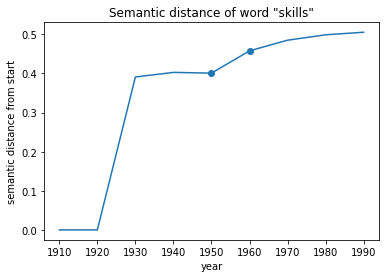

In [153]:
import matplotlib.pyplot as plt
x = years

y = semantic_change_top3[0]
plt.plot(x, y)
x_changes =[x[points_index[0][0]],x[points_index[0][1]]]
y_changes = [y[points_index[0][0]],y[points_index[0][1]]]
print(x_changes)
print(y_changes)
plt.scatter(x_changes,y_changes)
plt.xlabel('year')
# naming the y axis
plt.ylabel('semantic distance from start')
 
# giving a title to my graph
plt.title('Semantic distance of word "skills"')
 
# function to show the plot
plt.show()

[1930, 1960]
[0.4171531396274588, 0.4913651919227341]


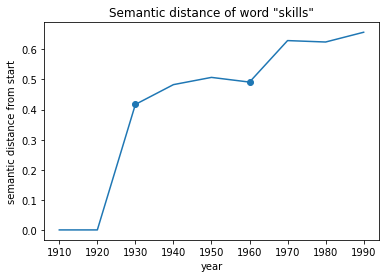

In [154]:
import matplotlib.pyplot as plt
x = years
y = semantic_change_top3[1]
plt.plot(x, y)
x_changes =[x[points_index[1][0]],x[points_index[1][1]]]
y_changes = [y[points_index[1][0]],y[points_index[1][1]]]
print(x_changes)
print(y_changes)
plt.scatter(x_changes,y_changes)
plt.xlabel('year')
# naming the y axis
plt.ylabel('semantic distance from start')
 
# giving a title to my graph
plt.title('Semantic distance of word "skills"')
 
# function to show the plot
plt.show()

[1970, 1940]
[0.5552169456204501, 0.4813709995037666]


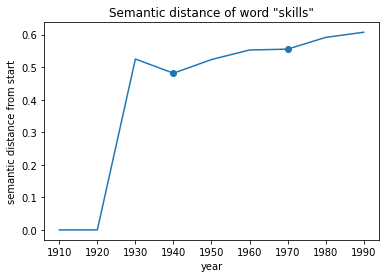

In [155]:
import matplotlib.pyplot as plt
x = years
y = semantic_change_top3[2]
plt.plot(x, y)
x_changes =[x[points_index[2][0]],x[points_index[2][1]]]
y_changes = [y[points_index[2][0]],y[points_index[2][1]]]
plt.scatter(x_changes,y_changes)
print(x_changes)
print(y_changes)
plt.xlabel('year')
# naming the y axis
plt.ylabel('semantic distance from start')
 
# giving a title to my graph
plt.title('Semantic distance of word "skills"')
 
# function to show the plot
plt.show()